In [1]:
from TNRmodelling import Simulation as Sim

save_model = False
# file directory for save file: str
save_dir = r'C:\Users\theod\Documents\Repos\Computer-Techniques\TNRModelV2'
# name of the save file
save_name = 'EquatorFlashNoDisk7sriseNonEllipse'
# spin frequency of neutron star
NS_Hz = 10 # /Hz
# NS latitude and longitude resolution 
# there will be this many equally spaced values drawn from the range 0->pi for polar and 0-> 2pi for azimuthal
# if you put 360 then there will be 0.5 degrees between each line of latitude and 1 degree between each line of longitude
angle_divisions = 50
# time resolution
dt = 1e-2 #/s
# flash start domain minimum (if only 1 angle fmin is the angle used)
fmin = 0#/pi*rads
# flash start domain maximum
fmax = 0.5#/pi*rads
# number of flash angles to test from the domain -0.5->0.5
flash_divisions = 10
# the flash axes ratio is the transformation of uniform flow to elliptic flow
# the ratio of the major axis and the minor axis of the ellipse formed in velocity space for the TNR frontspeed
flash_axes_ratio = 1
# observer start domain minimum (if observer divisions = 1 then omin is the angle used)
omin = 0.5#/pi*rads
# observer start domain maximum
omax = 0#pi*/rads
# number of observer angles to test from the domain -1/2->1/2 the values are 
observer_divisions = 10
# rise time
rise_time = 8 #/s
# cool timeS
cool_time=20 #/s
# do you want to turn on the accretion disk?
# set this variable true
acc_disk = False
# the number of points used to discretised the closed loop that generates the accretion disk
loop_resolution = 200
# number of subdivisions of angle of the surface revolution of the closed loop
angular_resolution = 500
# tilt angle of the accretion disk range {-pi/2, pi/2}, 0 is on the equator
tilt_angle = 0

# not currently been reintegrated
# # do you want to define your own parametric loop for the accretion disk?
# # write your own loop equation and change this variable to your function name otherwise put None
# # your function must take 1 input which is the parameter of the parametric curve in units of radians and defined over {0,2pi}
# # your function must output two arrays in order (xu, yu)
# # your function must also be defined such that min(xu), min(yu) = -1, max(xu), max(yu) = 1
# user_func = None

# inner radius of the accretion disk in units of NS radius > 1
inner_radius = 1
# if using the ellipse shape change these values
# outer radius of the accretion disk in units of NS radius
disk_radius = 3
# semi minor axis magnitude in units of NS radius
disk_width = 0.5
# observer azimuthal angle around the accretion disk in range {0,2pi}
observer_azim = 0
# projection plane domain divisions
domain_divisions = 32

print('sphere points', angle_divisions**2)
print('observer/ flash combinations', flash_divisions*observer_divisions)

sphere points 2500
observer/ flash combinations 100


In [6]:
model_class,model_totaltime, timesteps, result\
= Sim.RunEverything(
        NS_Hz, angle_divisions, dt,
        flash_divisions, fmin, fmax, flash_axes_ratio, observer_divisions, omin, omax,
        rise_time, cool_time,
        acc_disk, loop_resolution, angular_resolution, tilt_angle, inner_radius, disk_radius, disk_width, observer_azim, domain_divisions,  
        save_model, save_dir, save_name)

0.06283 mesh theta angle difference
0.12566 mesh phi angle difference
(100, 3, 3) (100, 3)
iterations 2800
0.1601 s/175 loops
0.0009 s/loop
0.6404 step time/s
0.1434 s/175 loops
0.0008 s/loop
0.5737 step time/s
0.1416 s/175 loops
0.0008 s/loop
0.5663 step time/s
0.1406 s/175 loops
0.0008 s/loop
0.5625 step time/s


[1.57079633 1.3962634  1.22173048 1.04719755 0.87266463 0.6981317
 0.52359878 0.34906585 0.17453293 0.        ]


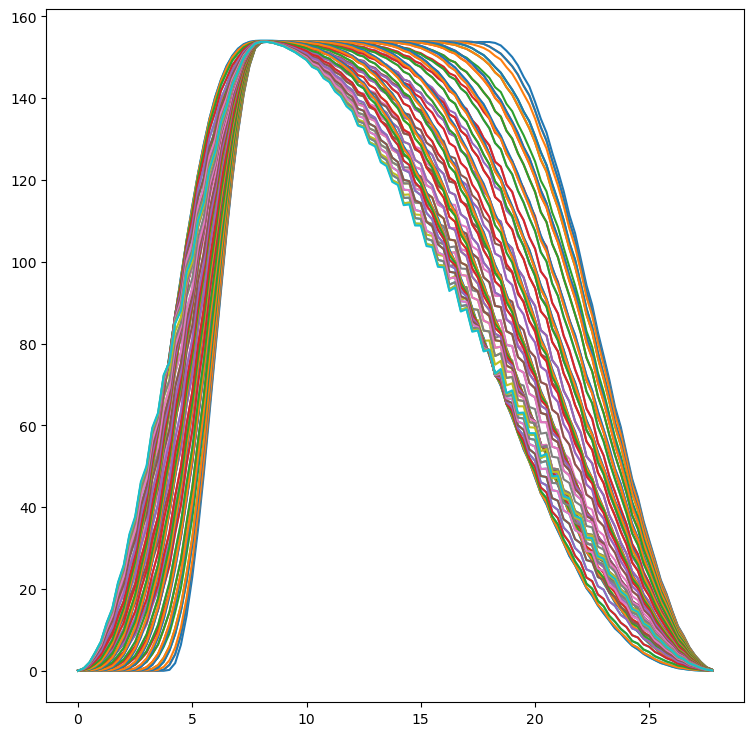

In [7]:
import numpy as np; import matplotlib.pyplot as plt
from TNRmodelling.DataManipulation import hist_data
observer_angles = np.pi*np.linspace(omin, omax, observer_divisions)
print(observer_angles)
time_bins, counts = hist_data(timesteps, result.T, model_totaltime, bin_width = 0.25)
fig = plt.figure(figsize = (9,9)); ax = ax = fig.add_subplot()
for i in range(counts.shape[0]):
    ax.plot(time_bins, counts[i])

